### Modéle Gradient Boosting et LightGBM (Light Gradient Boosting Machine)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('data_model.csv',sep=',')
df

,place,grav,an_nais,trajet,secu1,secu2,secu3,locp,actp,senc,...,catu_3,sexe_1,sexe_2,etatp_1,etatp_2,etatp_3,an_2020,an_2021,an_2022,agg_2
0,55061,2,2002.0,124202,288373,188748,473707,210485,179467,163253,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,355038,2,1993.0,178096,288373,188748,473707,210485,179467,163253,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,355038,1,1959.0,124202,288373,188748,473707,210485,179467,163253,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,355038,2,1994.0,124202,288373,188748,473707,210485,179467,215868,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,355038,1,1996.0,124202,288373,188748,473707,210485,263794,215868,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479026,355038,1,2002.0,178096,288373,180593,473707,232865,263794,163253,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
479027,2070,3,2004.0,178096,288373,180593,473707,232865,263794,163253,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
479028,355038,2,1953.0,178096,288373,180593,473707,232865,263794,163253,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
479029,355038,3,1992.0,64860,89852,44229,473707,210485,179467,215868,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [3]:
!pip install lightgbm scikit-learn

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 217.9 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.4 MB 438.9 kB/s eta 0:00:04
   --- ------------------------------------ 0.1/1.4 MB 504.4 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 568.9 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 557.9 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 593.2 kB/s eta 0:00:03
   ------ --------------------------------- 0.2/1.4 MB 577.6 kB/s eta 0:00:03
   ------- -------------------------------- 0.3/1.4 MB 606.6 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 589.5 kB/s eta 0:00:02
   --------- ---------

### Gradient Boosting

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score



# Assumant que df est déjà chargé avec vos données
X = df.drop('grav', axis=1)  # 'target' est la colonne avec les étiquettes
y = df['grav']


In [37]:
from sklearn.preprocessing import StandardScaler

#Séparation des données avec stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisation des données avec StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_sample_weight

# Calculer les poids d'équilibrage pour les classes
sample_weight = compute_sample_weight(class_weight='balanced', y=y_train)

# Créer le modèle de Gradient Boosting
model = GradientBoostingClassifier()

# Validation croisée avec les poids d'échantillons
scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy', fit_params={'sample_weight': sample_weight})


C:\Users\R\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


In [39]:
print("Scores de validation croisée :", scores)
print("Score moyen de validation croisée :", scores.mean())

Scores de validation croisée : [0.6038656  0.6039721  0.60394079]
Score moyen de validation croisée : 0.6039261634463378


In [40]:
# Entraîner le modèle final avec les poids d'échantillons
model.fit(X_train, y_train, sample_weight=sample_weight)

# Évaluer le modèle sur l'ensemble de test
test_score = model.score(X_test, y_test)
print("Score sur l'ensemble de test :", test_score)

Score sur l'ensemble de test : 0.6049140459465383


In [46]:
# Utiliser le modèle entraîné pour faire des prédictions
y_pred = model.predict(X_test)

# Afficher le classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.74      0.77      0.75     39762
           2       0.72      0.50      0.59     38847
           3       0.40      0.43      0.42     14703
           4       0.13      0.62      0.22      2495

    accuracy                           0.60     95807
   macro avg       0.50      0.58      0.50     95807
weighted avg       0.66      0.60      0.62     95807



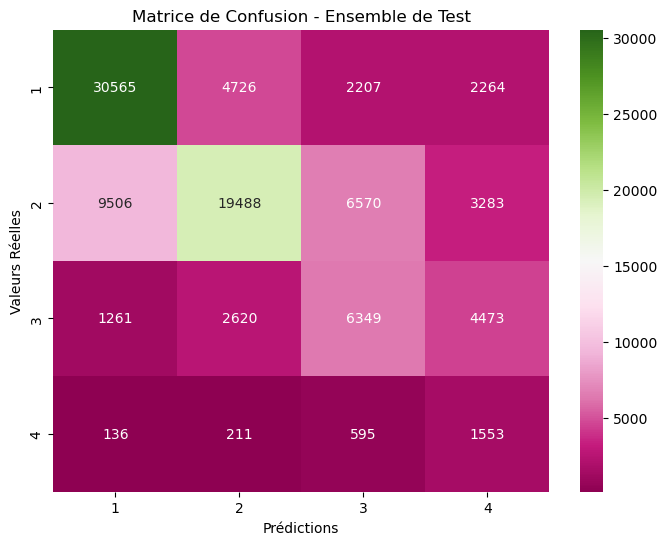

In [41]:
y_test_pred = model.predict(X_test)
# Calcul de la matrice de confusion pour l'ensemble de test
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Affichage stylé de la matrice de confusion pour l'ensemble de test avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(test_confusion_matrix, annot=True, cmap='PiYG', fmt="d", xticklabels=[1, 2, 3, 4], yticklabels=[1, 2, 3, 4])
plt.title('Matrice de Confusion - Ensemble de Test')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs Réelles')
plt.show()

In [42]:
def accuracy_pondéré(cm, coef_class_1=1, coef_class_2=2, coef_class_3=3, coef_class_4=4):
    # Calculer la précision pour chaque classe
    precision_per_class = np.diag(cm) / np.sum(cm, axis=1)

    # Afficher la précision pour chaque classe
    for i, precision in enumerate(precision_per_class, start=1):
        print(f"Precision par classe {i}: {precision:.4f}")

    # Calculer l'accuracy pondérée
    print("\n")
    print("l'accuracy pondéré est de:")
    weighted_accuracy = (
        (precision_per_class[0] * coef_class_1) +
        (precision_per_class[1] * coef_class_2) +
        (precision_per_class[2] * coef_class_3) +
        (precision_per_class[3] * coef_class_4)
    ) / (coef_class_1 + coef_class_2 + coef_class_3 + coef_class_4)

    return weighted_accuracy

In [43]:
accuracy_pondéré(test_confusion_matrix)

Precision par classe 1: 0.7687
Precision par classe 2: 0.5017
Precision par classe 3: 0.4318
Precision par classe 4: 0.6224


l'accuracy pondéré est de:


0.5557248944654705

#### LightGBM (Light Gradient Boosting Machine) 

Nous allons entrainé notre modèle avec une selection de variables importante et un gridsearch afin d'optimiser le modèle

In [31]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
# Sélection des variables spécifiques pour X
features = [
    'place', 'secu1', 'secu3', 'locp', 'manv', 'motor', 'nbv', 'vosp',
    'pr', 'jour', 'mois', 'hrmn', 'dep', 'com', 'col', 'long',
    'catu_3', 'an_2020', 'an_2021', 'agg_2'
]

X = df[features]
y = df['grav']

#Séparation des données avec stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisation des données avec StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Configuration du modèle
model = LGBMClassifier(class_weight='balanced', objective='multiclass',verbose=0)

# Définition de la grille de paramètres
param_grid = {
    'learning_rate': [0.001,0.01, 0.1,0.3],
    'num_leaves': [31, 100,300],
    'reg_alpha': [0, 1],
    'reg_lambda': [0, 1, 2.5]
}

# Utilisation de GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Entraînement du modèle avec GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LGBMClassifier(class_weight='balanced',
                                      objective='multiclass', verbose=0),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.3],
                         'num_leaves': [31, 100, 300], 'reg_alpha': [0, 1],
                         'reg_lambda': [0, 1, 2.5]},
             scoring='accuracy')

Explication des paramètres :

learning_rate :Taux d'apprentissage. Il contrôle la contribution de chaque arbre de décision à l'ensemble final.
Choix : Les valeurs couramment utilisées vont de 0.01 à 0.3. Des valeurs plus petites peuvent augmenter la précision mais nécessitent plus d'arbres.

num_leaves :Nombre maximal de feuilles par arbre. Plus ce nombre est élevé, plus le modèle est complexe.
Choix : Des valeurs plus élevées peuvent capturer des relations plus complexes mais augmentent le risque de surapprentissage. Typiquement, 31 est une valeur par défaut, 100 et 400 sont des valeurs plus agressives.


reg_alpha : Paramètre de régularisation L1. Il ajoute une pénalité sur les poids pour encourager la parcimonie du modèle (réduction des coefficients non nuls).
Choix : Des valeurs typiques sont 0 (pas de régularisation) à 1 ou 2. Utilisé pour prévenir le surapprentissage en ajoutant une contrainte sur les coefficients.

reg_lambda :Paramètre de régularisation L2. Similaire à reg_alpha mais utilise une régularisation L2 (pénalité quadratique).
Choix : Des valeurs typiques sont de 0 à 2.5. Aide également à prévenir le surapprentissage.

In [32]:
# Récupération du meilleur modèle
model_f = grid_search.best_estimator_

In [54]:
# Affichage des meilleurs hyperparamètres
best_params = grid_search.best_params_
print(f'Best parameters found: {best_params}')

# Évaluation du meilleur modèle sur l'ensemble de test
y_test_pred_lgbm  = model_f.predict(X_test)


Best parameters found: {'learning_rate': 0.3, 'num_leaves': 300, 'reg_alpha': 0, 'reg_lambda': 1}


In [34]:
accuracy = accuracy_score(y_test, y_test_pred_lgbm)
print(f'Accuracy: {accuracy}')

# Affichage du rapport de classification
report = classification_report(y_test, y_test_pred_lgbm)
print(f'Classification Report:\n{report}')

Accuracy: 0.6186499942592921
Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.75      0.73     39762
           2       0.68      0.53      0.60     38847
           3       0.42      0.56      0.48     14703
           4       0.17      0.26      0.21      2495

    accuracy                           0.62     95807
   macro avg       0.49      0.52      0.50     95807
weighted avg       0.64      0.62      0.62     95807



In [51]:

# Données pour les deux modèles
data = {
    'Metric': ['Precision', 'Recall', 'F1-score', 'Accuracy'],
    'Class 1 (XGBoost)': [0.74, 0.77, 0.75, ''],
     'Class 1 (LGBM)': [0.70, 0.75, 0.73, ''],
    
    'Class 2 (XGBoost)': [0.72, 0.50, 0.59, ''],
    'Class 2 (LGBM)': [0.68, 0.53, 0.60, ''],
    
    'Class 3 (XGBoost)': [0.40, 0.43, 0.42, ''],
     'Class 3 (LGBM)': [0.42, 0.56, 0.48, ''],
    
    'Class 4 (XGBoost)': [0.13, 0.62, 0.22, ''],
     'Class 4 (LGBM)': [0.17, 0.26, 0.21, ''],
    
    'Overall Accuracy (XGBoost)': ['', '', '', 0.60],
    'Overall Accuracy (LGBM)': ['', '', '', 0.62]
}

# Création du DataFrame
resume = pd.DataFrame(data)

print('tableau récapitulatif des deux modèles XgBoost vs LGBM:','\n')
resume

tableau récapitulatif des deux modèles XgBoost vs LGBM: 



,Metric,Class 1 (XGBoost),Class 1 (LGBM),Class 2 (XGBoost),Class 2 (LGBM),Class 3 (XGBoost),Class 3 (LGBM),Class 4 (XGBoost),Class 4 (LGBM),Overall Accuracy (XGBoost),Overall Accuracy (LGBM)
0,Precision,0.74,0.7,0.72,0.68,0.4,0.42,0.13,0.17,,
1,Recall,0.77,0.75,0.5,0.53,0.43,0.56,0.62,0.26,,
2,F1-score,0.75,0.73,0.59,0.6,0.42,0.48,0.22,0.21,,
3,Accuracy,,,,,,,,,0.6,0.62


Précision (Precision)
La précision mesure la proportion de prédictions correctes parmi les prédictions positives. Elle est importante lorsque le coût des faux positifs est élevé.

Classe 1 : XGBoost (0.74) est légèrement meilleur que LGBM (0.70).
Classe 2 : XGBoost (0.72) est meilleur que LGBM (0.68).
Classe 3 : LGBM (0.42) est meilleur que XGBoost (0.40).
Classe 4 : LGBM (0.17) est meilleur que XGBoost (0.13).

Le modèle LGBM prédit mieux la classe minoritaire que XgBoost, puis  LGBM est a de meilleures performances prédictives globales(0.62 contre 0.60 pour XgBoost), donc il sera retenu comme modèle final.